<a href="https://colab.research.google.com/github/Rajesh2015/E-news-Express-Project/blob/main/E-news%20Express%20Project%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description
##Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]



##Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


##Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - language chosen by the user to view the landing page


## **Import the necessary libraries**


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Library to help with statistical analysis
import scipy.stats as stats

## **Loading the dataset**

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# root path for the sample data
path='/content/drive/MyDrive/Python Course'

In [4]:
# load the data in to panda dataframe
enews_df=pd.read_csv(f'{path}/abtest.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
df = enews_df.copy()

In [6]:
colors = sns.color_palette('Set2')  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values

In [7]:
# looking at head (5 observations)
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [8]:
# Shape of dataset
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows in dataset")

There are 6 columns and 100 rows in dataset


In [9]:
# Details about the dataset in terms of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
Data set contain 6 columns:
* user_id  
* group
* landing_page
* time_spent_on_the_page
* converted
* language_preferred
---
Below is the table for overview:

| Column Name             | Data Type   |
|-------------------------|-------------|
| `user_id`               | int64       |
| `group`                 | object      |
| `landing_page`          | object      |
| `time_spent_on_the_page`| float64     |
| `converted`             | object      |
| `language_preferred`    | object      |


In [10]:
# Descriptive statistics  of given sample excluding object values
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Observations

The average time spent by the users on the page is 5.38 minutes. The minimum time spent is 0.19 minutes and the maximum time spent is 10.71 minutes. 50% of the people spent 5.415 or less than 5.415 minutes on a page. The time spent is a continuous variable.

In [11]:
# Descriptive statistics  of given sample excluding numerical values
df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [12]:
# Print unque values in  catogorical fields converted,landing_page and group columns
print(f"Converted: {df['converted'].unique()}, Landing Page: {df['landing_page'].unique()}, Group: {df['group'].unique()}")

Converted: ['no' 'yes'], Landing Page: ['old' 'new'], Group: ['control' 'treatment']


### Observations
**Group**: The group has two unique values **control** and  **treatment**. Both values have an equal number of entries in the dataset.

**Landing Page**: The Landing page has two unique values **old** and **new** representing the old version of the landing page and the new version respectively.

**Converted**:The converted has two unique values **yes** and **no** .There is a slight more no of people getting converted to subscribers after viewing the landing page in this sample.

**Language Preferred**:Users prefer to read the page in 3 different languages and the most preferred one is **Spanish**.

---
- Unique values in catogorical fileds

| Column               | Unique Values               |
|----------------------|-----------------------------|
| `group`              | ['control', 'treatment']    |
| `landing_page`       | ['old', 'new']              |
| `converted`          | ['no', 'yes']               |
| `language_preferred` | ['Spanish', 'English', 'French'] |



In [13]:
# Check for missing data
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


### Observations
There is no null values in sample data set.

In [14]:
# Printing the duplicated rows
print(f"Number of duplicate rows: {df.shape[0] - df.drop_duplicates().shape[0]}")

Number of duplicate rows: 0


### Observations
There is no duplicated rows

### Utils

In [15]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [16]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [17]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 4),
                      textcoords='offset points')

In [18]:

def plot_stacked_bar_with_annotations(df, x, y, normalize='index', figsize=(8, 6)):
    """
    Creates a stacked bar plot with pastel colors and annotates each bar with proportion values.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - y (str): The column name to be used for the y-axis categories.
    - normalize (bool, optional): If True, normalizes the values to proportions. Default is True.
    - figsize (tuple, optional): The size of the figure. Default is (8, 6).

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """
    # Create the crosstab
    crosstab = pd.crosstab(df[x], df[y], normalize=normalize)*100

    # Create the plot
    ax = crosstab.plot(kind='bar', stacked=True, figsize=figsize, color=['#66c2a5', '#fc8d62'])

    # Add labels to the axes
    formatted_string = ' '.join(word.capitalize() for word in x.split('_'))
    plt.xlabel(formatted_string)
    plt.ylabel('Proportion' if normalize else 'Count')
    plt.title(f'Proportion of {y} by {x}' if normalize else f'Count of {y} by {x}')

    # Annotate the bars with proportion or count values
    for container in ax.containers:
        ax.bar_label(container, label_type='center')

    return plt

In [19]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [20]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [21]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [22]:
def plot_test_statistic_distribution(alpha=0.05, p_value=None):
    """
    Plots the test statistic distribution with the critical value and indicates the rejection and acceptance regions.
    Optionally, plots a dotted line for a given p-value.

    Parameters:
    - alpha (float): The significance level for the test. Default is 0.05.
    - p_value (float, optional): The p-value to plot as a dotted line. Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Find the critical value
    critical_val = stats.norm.ppf(1 - alpha)

    # Plotting the test statistic distribution
    x = np.linspace(-4, 4, 100)  # Create an array of 100 numbers from -4 to 4
    plt.plot(x, stats.norm.pdf(x, 0, 1), label='Normal Distribution')  # Plot the PDF of the normal distribution

    # Draw the critical value line
    plt.axvline(x=critical_val, color='r', linestyle='--', label='Critical Value')

    # Fill the rejection region
    x1 = np.linspace(critical_val, 4, 50)  # Create an array from the critical value to 4
    plt.fill_between(x1, stats.norm.pdf(x1, 0, 1), color='r', alpha=0.5, label='Rejection Region')

    # Add annotations
    plt.annotate('Reject Null', (critical_val + .5, 0.15), color='r')
    plt.annotate('Do Not Reject Null', (-1.3, 0.15), color='black')

    # Plot p-value as a dotted line if provided
    if p_value is not None:
        p_val_critical = stats.norm.ppf(1 - p_value)
        plt.axvline(x=p_val_critical, color='b', linestyle=':', label=f'P-Value: {p_value}')

    # Adding labels and title
    plt.xlabel('Test Statistic')
    plt.ylabel('Probability Density')
    plt.title('Test Statistic Distribution with Critical Value and P-Value')
    plt.legend(loc='upper left')

    # Return plt for further customization or saving
    return plt

In [23]:
def plot_rejection_region(test_stat, alpha=0.05, tail='right'):
    """
    Plots the Z-test distribution with rejection regions based on the test statistic.

    Parameters:
    test_stat (float): The test statistic value from the Z-test.
    alpha (float): The significance level for the test (default is 0.05).
    tail (str): The type of test ('right', 'left', 'two') (default is 'right').
    """
    # Calculate critical value(s) based on the tail type
    if tail == 'right':
        z_critical = stats.norm.ppf(1 - alpha)
    elif tail == 'left':
        z_critical = stats.norm.ppf(alpha)
    elif tail == 'two':
        z_critical = stats.norm.ppf(1 - alpha/2)
    else:
        raise ValueError("Invalid value for tail. Use 'right', 'left', or 'two'.")

    # Generate values for the z distribution
    z_values = np.linspace(-4, 4, 1000)
    z_distribution = stats.norm.pdf(z_values)

    # Plot the z distribution
    plt.figure(figsize=(10, 6))
    plt.plot(z_values, z_distribution, label='Z-distribution', color='blue')

    # Shade the rejection region(s)
    if tail == 'right':
        plt.fill_between(z_values, 0, z_distribution, where=(z_values >= z_critical), color='red', alpha=0.5)
    elif tail == 'left':
        plt.fill_between(z_values, 0, z_distribution, where=(z_values <= z_critical), color='red', alpha=0.5)
    elif tail == 'two':
        plt.fill_between(z_values, 0, z_distribution, where=(z_values <= -z_critical), color='red', alpha=0.5)
        plt.fill_between(z_values, 0, z_distribution, where=(z_values >= z_critical), color='red', alpha=0.5)

    # Add the test statistic to the plot
    plt.axvline(test_stat, color='green', linestyle='--', label=f'Test Statistic: {test_stat:.2f}')

    # Add titles and labels
    plt.title(f'Z-Test Distribution with {tail.capitalize()}-Tailed Rejection Region')
    plt.xlabel('Z-value')
    plt.ylabel('Density')
    plt.legend()

    # Display the plot
    plt.show()

In [24]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [25]:
def check_and_print_inference(p_value, alpha=0.05):
    """
    Prints the inference based on the p-value and significance level.

    Parameters:
    p_value (float): The p-value from the statistical test.
    alpha (float): The significance level for the test (default is 0.05).
    """
    if p_value < alpha:
        print(f'P-value {p_value:.4f} is less than the significance level {alpha:.4f}, we reject the null hypothesis.')
    else:
        print(f'P-value {p_value:.4f} is greater than the significance level {alpha:.4f}, we fail to reject the null hypothesis.')


## Univariate Analysis

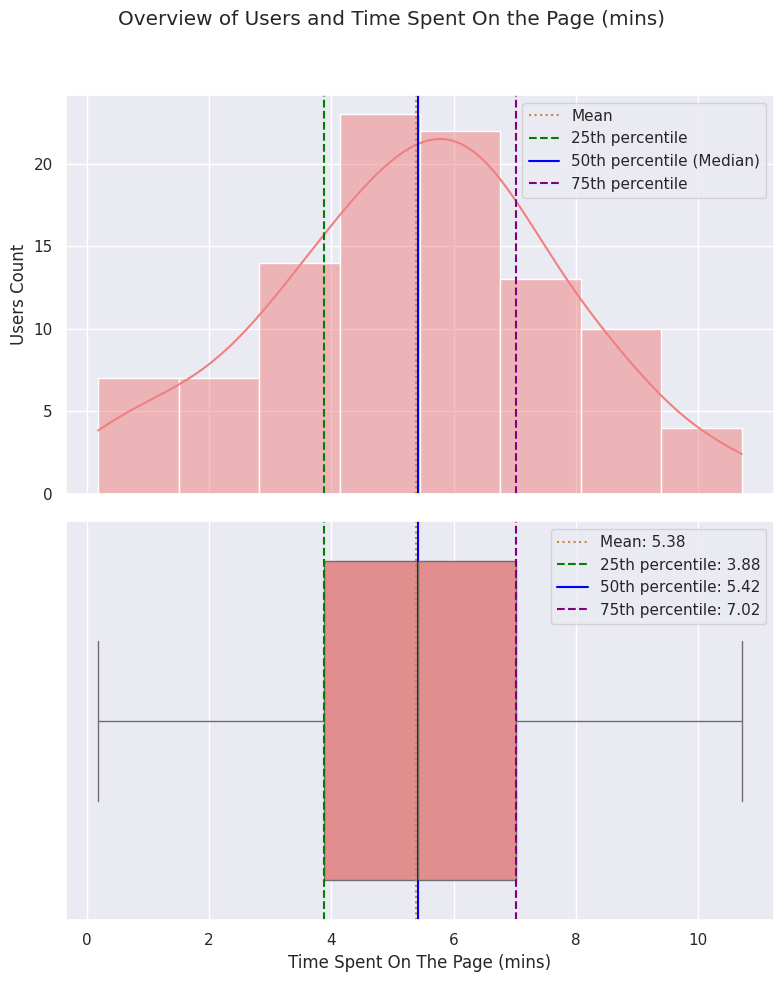

In [26]:
# plotting on time spent on the page with box plot and histogram
plot_histogram_and_boxplot(df, column='time_spent_on_the_page', xlabel='Time Spent On The Page (mins)',ylabel="Users Count",title="Overview of Users and Time Spent On the Page (mins)")

### Observations:
- Time spent on page follows a normal distribution (Not skewed)
- Avg time on the page is around 5.38 mins
- Below is the 5 number summary

| **Statistic**          | **Value**  |
|------------------------|------------|
| **Min Time Spent**      | 0.19       |
| **Mean**                | 5.38       |
| **25th Percentile**     | 3.88       |
| **50th Percentile**     | 5.42       |
| **75th Percentile**     | 7.02       |
| **Max Time Spent**      | 10.71      |


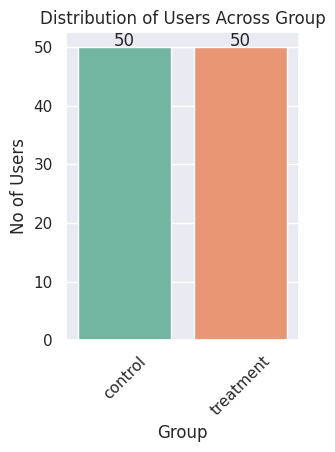

In [27]:
# Distribution  of users across group using count plot to check it
plt=draw_count_plot(df,"group","Group","No of Users","Distribution of Users Across Group",hue="group")
plt.show()

### Observation:


*   Each group has equal no of users (control=50,treatment=50)



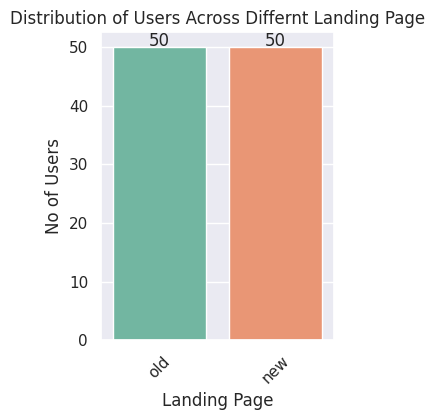

In [28]:
# Distribution  of users across group using count plot to check it
plt=draw_count_plot(df,"landing_page","Landing Page","No of Users","Distribution of Users Across Differnt Landing Page",hue="landing_page")
plt.show()

### Observation:


- Both landing page old and new are equally preffered by users



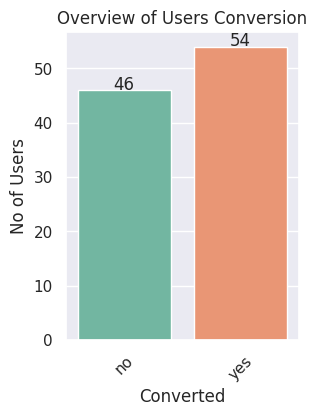

In [29]:
# count plot to check the conversion of users who subscribed to E-news
plt=draw_count_plot(df,"converted","Converted","No of Users","Overview of Users Conversion",hue="converted")
plt.show()

### Observation:
Its found that more people have subscribed to news from E-news Express (54) compared to non subscriber (46).It would be good to see if landig page have any effect on this conversion

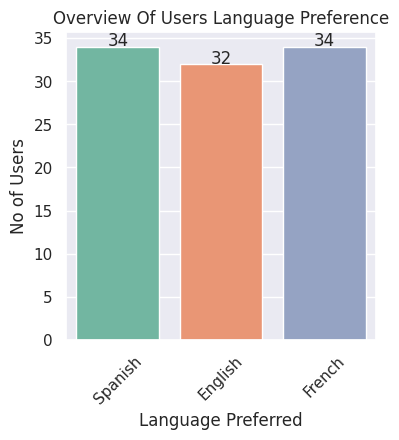

In [30]:
# Overview of users language preference in count plot
plt=draw_count_plot(df,"language_preferred","Language Preferred","No of Users","Overview Of Users Language Preference",hue="language_preferred")
plt.show()

### Observations:
- It's observed that preffered language is almost same in this sample (Though english is lagging a bit if we compare with french and spanish).It would be good to see if users of any specific language have more conversion rate then others.

## Bivariate Analysis

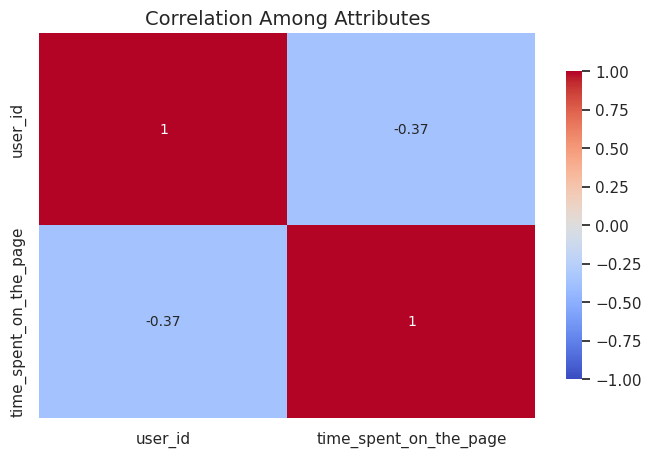

In [31]:
# Correalton between numerical Attributes using corr and heatmap
plt.figure(figsize=(8, 5))

# Create a heatmap to visualize the correlation matrix of the DataFrame
axis = sns.heatmap(
    df.corr(numeric_only=True),     # Calculate the correlation matrix for numerical columns only
    annot=True,                     # Annotate each cell with the correlation value
    vmin=-1, vmax=1,                # Set the range for the colormap from -1 to 1 (standard for correlation)
    cmap='coolwarm',                # Use the 'coolwarm' colormap, which ranges from blue (negative correlation) to red (positive correlation)
    annot_kws={'size': 10},         # Set the font size for the annotations inside the heatmap cells
    cbar_kws={'shrink': 0.8}        # Shrink the color bar to 80% of its default size to better fit the plot
)

# Set the title for the heatmap
axis.set_title('Correlation Among Attributes', fontsize=14) # Title with font size of 14

# Display the plot
plt.show()

### Observation:
Though "user_id" and "time_spent_on_the_page" shows nagative corelation but it does not make sense as user_id is just a unique id.

#### Landing Page Vs Converted

In [32]:
# create a contingency table to tabulate the frequencies of the two categorical variables (landing page and converison) from overall users
pd.crosstab(df['landing_page'],df['converted'],margins=True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


In [33]:
# create a contingency table to tabulate the frequencies of the two categorical variables (landing page and converison)
pd.crosstab(df['landing_page'], df['converted'], normalize='index') * 100

converted,no,yes
landing_page,,
new,34.0,66.0
old,58.0,42.0


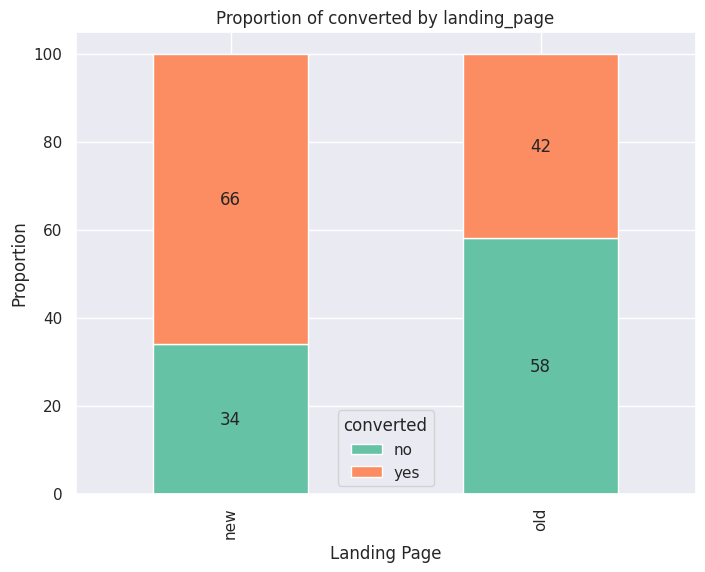

In [34]:
# Draw stack bar chat to compare frequncies to show the propertion of user converted by landing page
plt=plot_stacked_bar_with_annotations(df,x='landing_page',y='converted',normalize='index')
plt.show()

### Observations:
It was observed from the sample data that users landing one new landing page(66%) has more chance to convert then old landing page(42%).


#### Language Preferred Vs Converted

In [35]:
# create a contingency table to tabulate the propertions of the two categorical variables (language_preferred and converison)
pd.crosstab(df['language_preferred'], df['converted'], normalize='index') * 100

converted,no,yes
language_preferred,,
English,34.375000,65.625000
French,55.882353,44.117647
Spanish,47.058824,52.941176


In [36]:
# create a contingency table to tabulate the frequencies of the two categorical variables (language_preferred and converison)
pd.crosstab(df['language_preferred'], df['converted'], margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


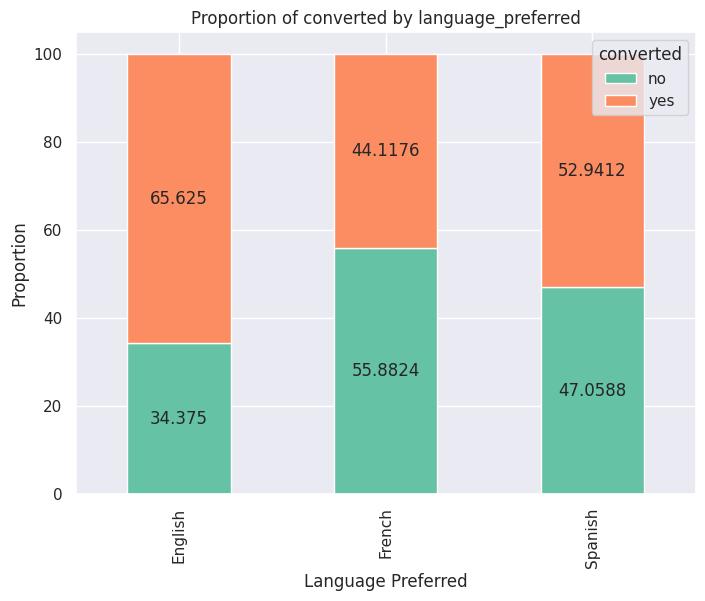

In [37]:
# Draw stack bar chat to compare the propertion of user converted for any specific
plt=plot_stacked_bar_with_annotations(df,x='language_preferred',y='converted',normalize='index')
plt.show()

### Observation:
- English Language Group:
    A larger proportion of users who prefer English converted (65%), compared to those who did not convert (34.375%).
    This suggests that English-speaking users have a higher conversion rate.

- French Language Group:
    The proportion of users who converted (44%) is slightly lower than the proportion who did not (55%).
    French-speaking users have the lowest conversion rate among the three language groups.

- Spanish Language Group:
    The conversion rate is also lower for this group (52.94% converted vs 47% not converted), but the difference is not as pronounced as with the French group.Spanish-speaking users have a conversion rate that is slightly better than French-speaking users but still lower than English-speaking users.

### group vs converted

In [38]:
# Show count each unique value in the landing_page column, grouped by the group
df.groupby('group')['landing_page'].value_counts().reset_index()

,group,landing_page,count
0,control,old,50
1,treatment,new,50


### Observation:
It seems control group uses old landing page where as treatment is in to new landing page

In [39]:
#  return Contingency table to tabulate the frequencies of group and conversion rate
pd.crosstab(df['group'],df['converted'],margins=True)

converted,no,yes,All
group,,,
control,29,21,50
treatment,17,33,50
All,46,54,100


In [40]:
#  return Contingency table to tabulate the propertion in percentage of group and conversion rate
pd.crosstab(df['group'],df['converted'],normalize='index')*100

converted,no,yes
group,,
control,58.0,42.0
treatment,34.0,66.0


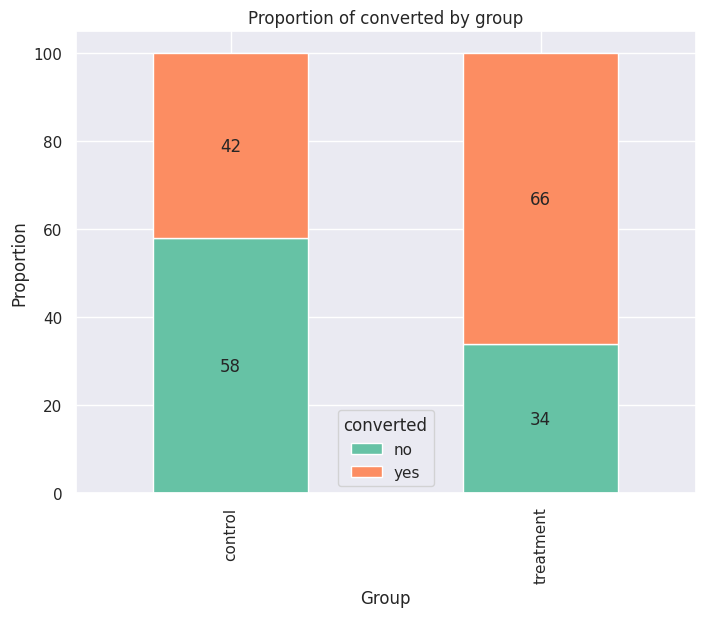

In [41]:
# Draw stack bar chat to compare the relation of user converted form any specific group
plt=plot_stacked_bar_with_annotations(df,x='group',y='converted',normalize='index')
plt.show()

### Observations:
It is observed that users of treatment group has higher chances(66%) of getting converted to subscribers  compare to control(42%) according to sample.It might be due to use of new landing page .As treatmeant group use new landing page.

#### Converted Vs Time Spent on the Landing Page

In [42]:
# Contigency table to check if any relation between time spent on page with conversion
pd.crosstab(df['time_spent_on_the_page'],df['converted'],normalize='index')*100

converted,no,yes
time_spent_on_the_page,,
0.19,100.0,0.0
0.22,100.0,0.0
0.40,100.0,0.0
0.91,100.0,0.0
0.93,100.0,0.0
...,...,...
9.15,100.0,0.0
9.49,0.0,100.0
10.30,0.0,100.0


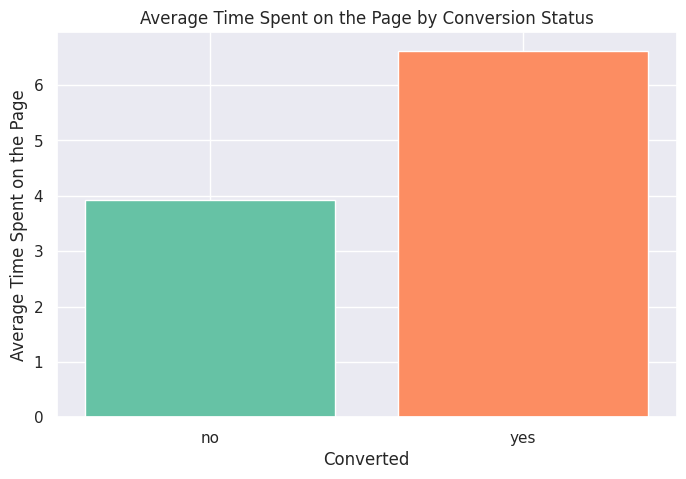

In [43]:

# Calculate the mean time spent on the page grouped by conversion status
mean_time_spent = df.groupby(['converted'])['time_spent_on_the_page'].mean().reset_index()

# Plotting the result as a bar plot
plt.figure(figsize=(8, 5))
plt.bar(mean_time_spent['converted'], mean_time_spent['time_spent_on_the_page'], color=colors)

# Adding title and labels
plt.title('Average Time Spent on the Page by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Average Time Spent on the Page')

# Display the plot
plt.show()

### Observation :
It seems people who spends more time on landing page have higher chance to get converted.It will be intresting to see if any specific landing page has more advanatages then other in the given sample

#### time_spent_on_the_page vs landing_page and  converted (Mutivariate Analysis)

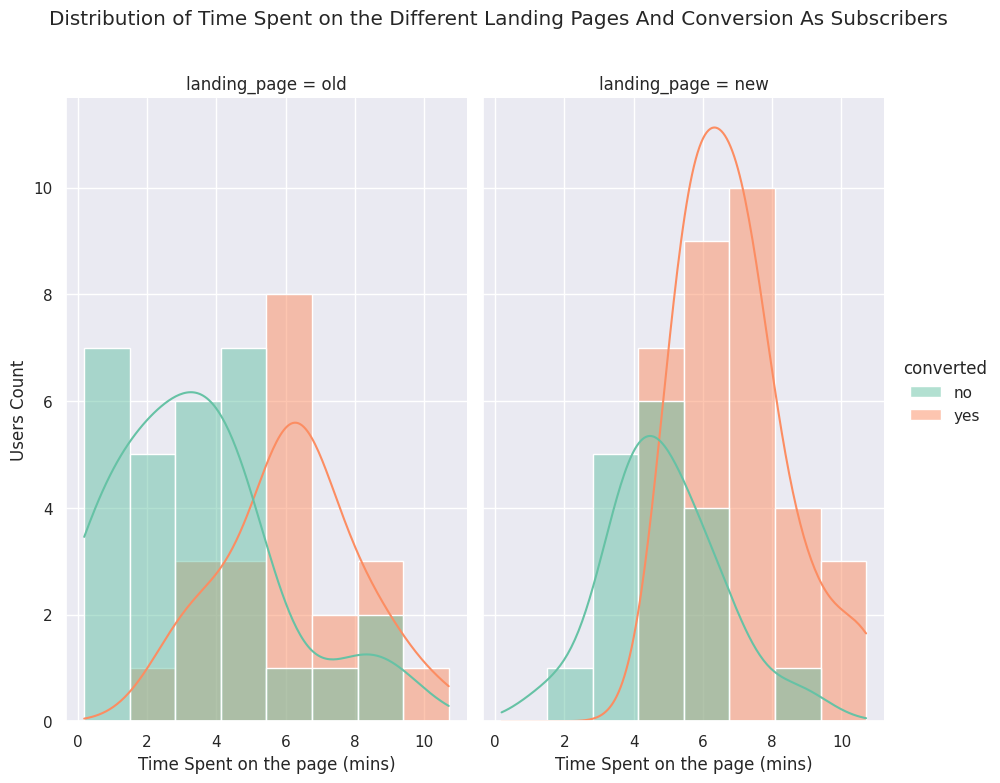

In [44]:
# Create a distribution plot for 'time_spent_on_the_page' with landing page and their conversion rate conditions
plot = sns.displot(
    data=df,                        # The DataFrame containing your data
    x='time_spent_on_the_page',     # The variable to be plotted on the x-axis
    hue='converted',                # Color-code the plot by the 'converted' column (e.g., True/False)
    col='landing_page',             # Create a separate plot for each unique value in 'landing_page'
    kind='hist',                    # The type of plot, which in this case is a histogram
    palette='Set2',                 # Use the 'Set2' color palette for different hues
    kde=True                        # Overlay a KDE (Kernel Density Estimate) on the histogram
)

# Adjust the overall size of the figure
plot.fig.set_size_inches(10, 8)     # Set the figure size to 10 inches wide by 8 inches tall

# Set the main title of the figure
plot.fig.suptitle(
    'Distribution of Time Spent on the Different Landing Pages And Conversion As Subscribers',
    y=1.03                          # Adjust the y position of the title to make it more visible
)

# Set the labels for the x-axis
plot.set_xlabels('Time Spent on the page (mins)')

# Set the labels for the y-axis
plot.set_ylabels('Users Count')

# Display the plot
plt.show()

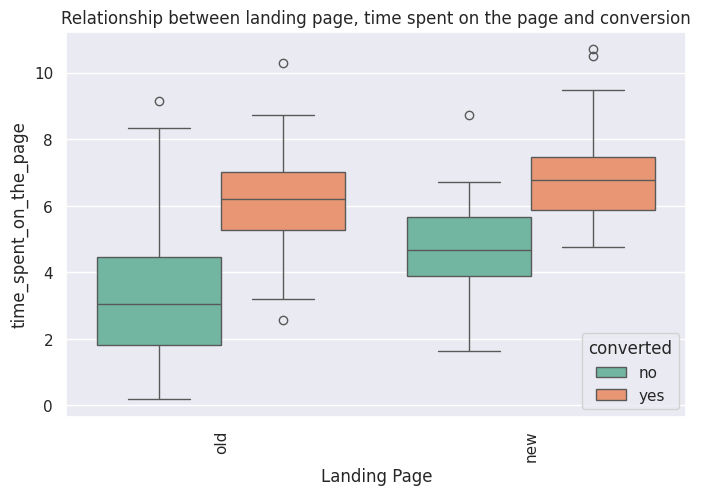

In [45]:
# Box plot to show the relationship between time_spent_on_the_page converted and landing_page

plt=plot_boxplot(df, x_col='landing_page', y_col='time_spent_on_the_page', hue_col='converted',
             title="Relationship between landing page, time spent on the page and conversion",
             xlabel="Landing Page")
plt.show()

### Observation:
 - It's observed that user who is spending more time on new landing page have more probability of getting converted as subscribers .It's not surprsing as we found already that new landing oage has more conversion.
 - There are few outliers in both old and new conveted case

#### time_spent_on_the_page vs language_preferred and converted (Mutivariate Analysis)


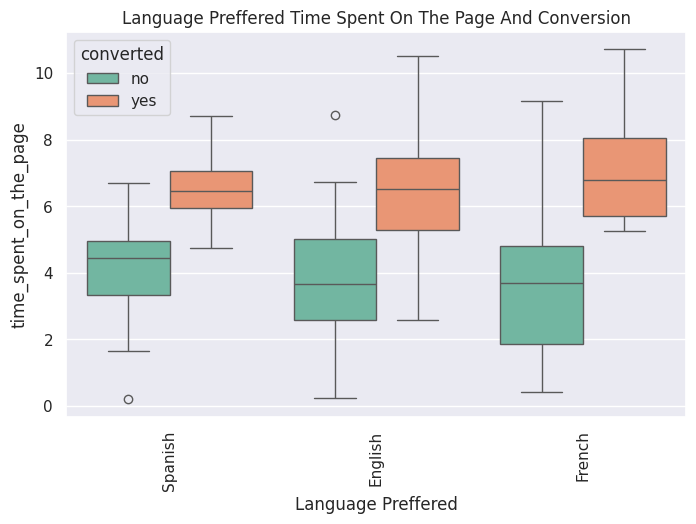

In [46]:
# Box plot to show the relationship between time_spent_on_the_page converted and landing_page

plt=plot_boxplot(df, x_col='language_preferred', y_col='time_spent_on_the_page', hue_col='converted',
             title="Language Preffered Time Spent On The Page And Conversion",
             xlabel="Language Preffered")
plt.show()

#### Observation:
- Spanish: We can observe 75% of converted users have spent around 6-7 mins
- English: We can observe 75% of converted users have spent around 5.4-7.4mins(Approx)
-  French: We can observe 75% of converted users have spent around 5.9-8.1mins(Approx)


---
It seems users who use spanish with less time on the landing page have more chance to be converted


####Q1.Do the users spend more time on the new landing page than the old landing page?


---
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value


In [47]:
# return mean time for each of the landing page
df.groupby('landing_page')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


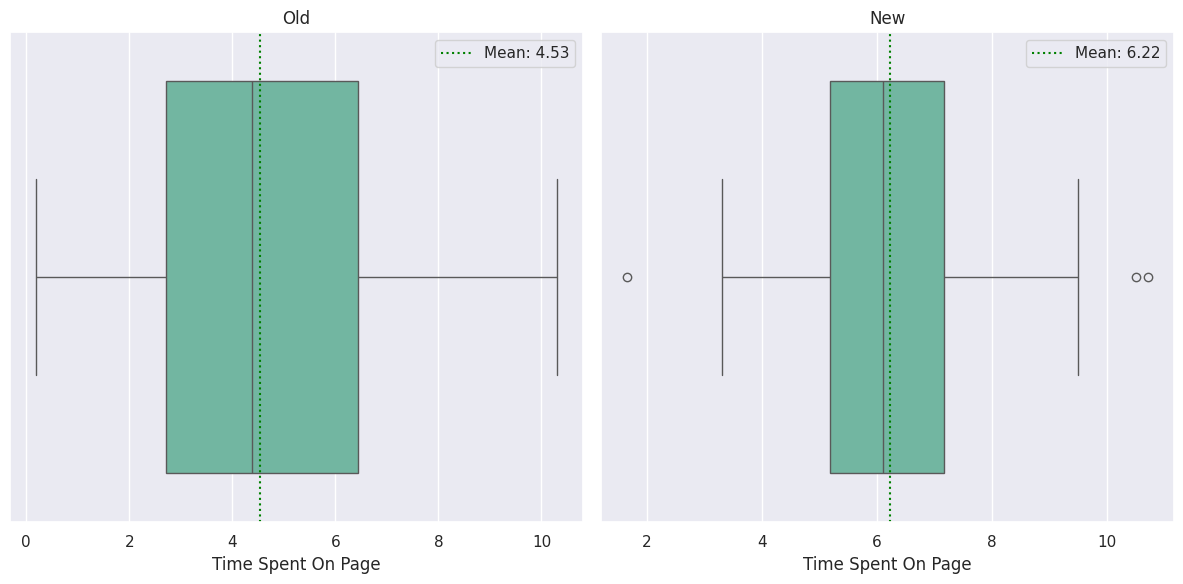

In [48]:
# Box plot to show time spent on page based on different landing page
plt=plot_box_plot_side_by_side(df, x='time_spent_on_the_page', xlabel='Time Spent On Page', category_col='landing_page',color=colors[0])
plt.show()

### Observations:
- Old landing page has more distribution of data.It's little bit skwed towards right.Mean avg time spent for old landing page is "4.53".
- New landing page has some outlighers and compared to old landing page has less distribution of data.Mean avg time spent for new landing page is "6.22".

**Step1:** Define null and alternate Hypothesis
---
Assume μ1 and μ2  be the mean time spent on the new landing page and old
landing page respectively.
- > $H_0:$ The mean time spent on old and new landing page are same.
- > $H_a:$ The mean time spent on new  landing page is greater then old landing page.


$H_0:$μ1=μ2 (Null Hypoyhesis)

$H_a:$ μ1>μ2 (Alternate hypothesis)


In [49]:
# Calculate mean and standard deviation
mean_df = df.groupby('landing_page')['time_spent_on_the_page'].mean()
std_df = df.groupby('landing_page')['time_spent_on_the_page'].std()

# Print mean and standard deviation
print(f"Mean time spent on the new landing page: {np.round(mean_df['new'], 2)}")
print(f"Standard deviation of time spent on the new landing page: {np.round(std_df['new'], 2)}")
print(f"Mean time spent on the old landing page: {np.round(mean_df['old'], 2)}")
print(f"Standard deviation of time spent on the old landing page: {np.round(std_df['old'], 2)}")


Mean time spent on the new landing page: 6.22
Standard deviation of time spent on the new landing page: 1.82
Mean time spent on the old landing page: 4.53
Standard deviation of time spent on the old landing page: 2.58


**Step 2:**

This is one tailed test(Right Tailed).As we have two indpedent sample and population standard deviation  is unknown so **Two Independent Sample T-test for Equality of Means - Unequal Std Dev** can be used for this.

* Continuous data - Yes, the SAT score is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Voila! We can use **two sample T-test** for this problem.


**Step 3 :**
Assumption of Significance Level
---
We assume the significance level $\alpha$ to be 0.5. This value represents the probability of rejecting the null hypothesis when it is actually true.

- **Significance Level $\alpha$**: 0.5

**Step 4: Filter and prepare data**

In [50]:
# Sub set the data based on old and new landing page and select col time_spent_on_the_page
ts_new=df[df['landing_page']=='new']['time_spent_on_the_page']
ts_old=df[df['landing_page']=='old']['time_spent_on_the_page']

**Step 5: Calculate the p-value and Teststats**

In [51]:
from scipy.stats import ttest_ind

# find the p-value
test_stat_1, p_value_1 = ttest_ind(ts_new,ts_old,equal_var = False, alternative = 'greater')
print('The p-value is ', p_value_1)
print('The test stat is ', test_stat_1)

The p-value is  0.0001392381225166549
The test stat is  3.7867702694199856


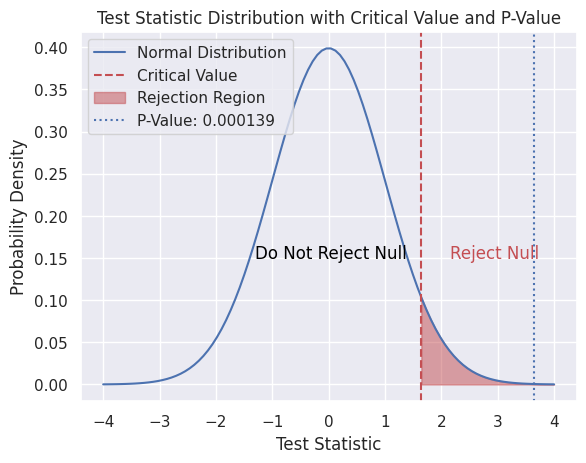

In [52]:
# Plotting P value and rejection critical region
plt = plot_test_statistic_distribution(alpha=0.05, p_value=np.round(p_value_1,6))
plt.show()  # Display the plot

**Step 6: Compare the p-value with $\alpha$**

In [53]:
# print Inference
check_and_print_inference(p_value_1)

P-value 0.0001 is less than the significance level 0.0500, we reject the null hypothesis.


**Rejection region approach**

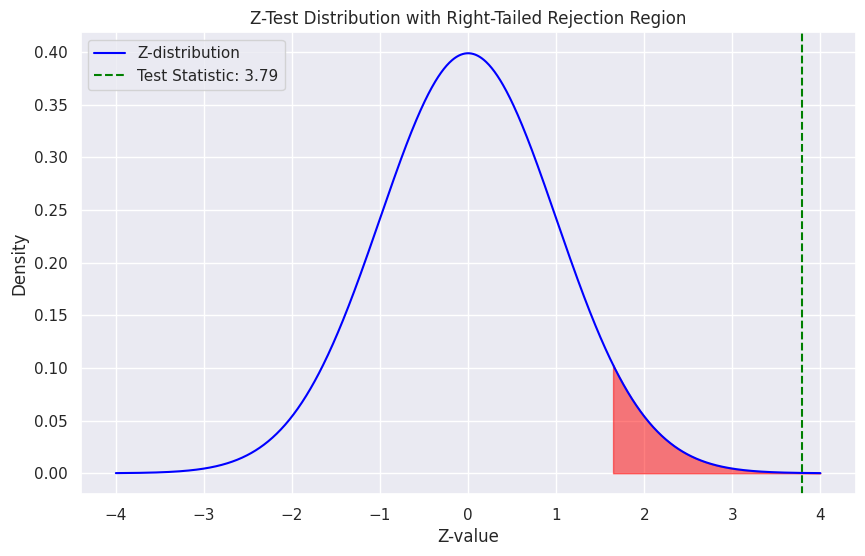

In [54]:
plot_rejection_region(test_stat_1, alpha=0.05, tail='right')

**Step 7**:
**Insights**

The p-value (0.0001392381225166549) is less than the level of significance (0.05) and we, therefore, reject the null hypothesis.(Shown in graph as well in blue dotted line).
- The test statistics 3.79 lies in rejection region so we reject the null hypthosis.

At .05 significance level, we conclude that we have enough statistical evidence to say that users spend more time on the new landing page than on the existing landing page

#### Q2.Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?


---
-  Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value


In [55]:
pd.crosstab(df['landing_page'], df['converted'], normalize='index') * 100

converted,no,yes
landing_page,,
new,34.0,66.0
old,58.0,42.0


**We have created a stacked Bar Chart before on this. so we will be going with count plot now**

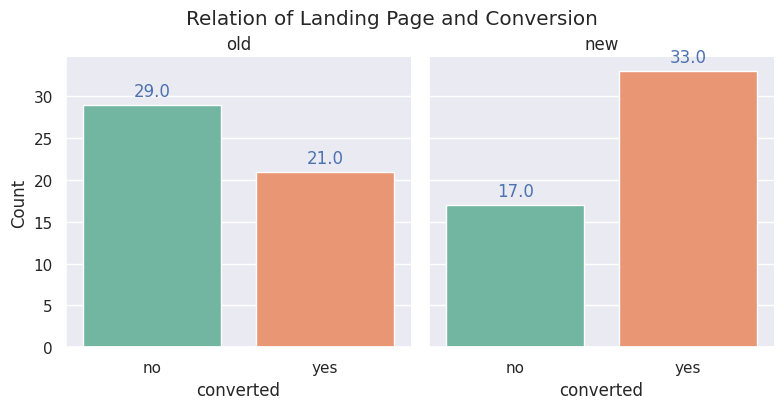

In [56]:
# cat plot using utility function for relation between Landing Page and Conversion
create_catplot_with_annotations(df, x='converted', hue='converted', col='landing_page', colors=(colors[0],colors[1]), title="Relation of Landing Page and Conversion");

### Observation:
- 21 out of 50 users from old landing page which is 42% are converted as subscriber.
- 33 out of 50 users from new landing page which is 66% are converted as subscribers
- So, more of those served with the new landing page have more chances of getting converted.

**Step1:** Define null and alternate Hypothesis
---
Assume $p_1,p_2$  be the proportions of  conversion of the new landing page and old
landing page respectively.
- > $H_0:$ The propertion of conversions of  old and new landing page are same.
- > $H_a:$ The propertion of conversions of new  landing page is greater then old landing page.


- $H_0:$ $p_1$ = $p_2$ (Null Hypoyhesis)
- $H_a:$ $p_1$>$p_2$ (Alternate hypothesis

**Step 2:**
This is a right-tailed test consisting two proportions from two independent populations.

A **Two Proportions Z-Test** would be the appropriate test to perform.
### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
**Normal Approximation**

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 400 \cdot \frac{50-21}{50} =19 \geq 10 $

**Step 3 :**
Assumption of Significance Level
---
We assume the significance level $\alpha$ to be 0.5. This value represents the probability of rejecting the null hypothesis when it is actually true.

- **Significance Level $\alpha$**: 0.5

**Step 4**: Filter and prepare data

In [57]:
temp_df = df.groupby('landing_page')['converted'].value_counts().reset_index()
# Filtering the DataFrame for "old" landing page and "yes" converted
old_landing_df = temp_df[(temp_df['landing_page'] == 'old') & (temp_df['converted'] == 'yes')]['count']

# Filtering the DataFrame for "new" landing page and "yes" converted
new_landing_df = temp_df[(temp_df['landing_page'] == 'new') & (temp_df['converted'] == 'yes')]['count']
new_count=df.groupby('landing_page')['converted'].count()['new']
old_count=df.groupby('landing_page')['converted'].count()['old']
# Print each value on a separate line
print(f"New landing page - Yes converted count: {new_landing_df.iloc[0]}")
print(f"Old landing page - Yes converted count: {old_landing_df.iloc[0]}")
print(f"Total visitors on new landing page: {new_count}")
print(f"Total visitors on old landing page: {old_count}")

New landing page - Yes converted count: 33
Old landing page - Yes converted count: 21
Total visitors on new landing page: 50
Total visitors on old landing page: 50


**Step 5: Calculate the p-value and Teststats**

In [58]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
landing_converion_count = [new_landing_df.iloc[0],old_landing_df.iloc[0]]

# set the sample sizes
nobs = [new_count,old_count]

# find the p-value
test_stat_2, p_value_2 = proportions_ztest(landing_converion_count, nobs)
print(f'The p-value is {p_value_2}')
print(f'The test_stat is  {test_stat_2}')

The p-value is 0.016052616408112556
The test_stat is  2.4077170617153842


In [59]:
# print final inferencebased on p-value
check_and_print_inference(p_value_2)

P-value 0.0161 is less than the significance level 0.0500, we reject the null hypothesis.


**Step 6: Compare the p-value with $\alpha$**

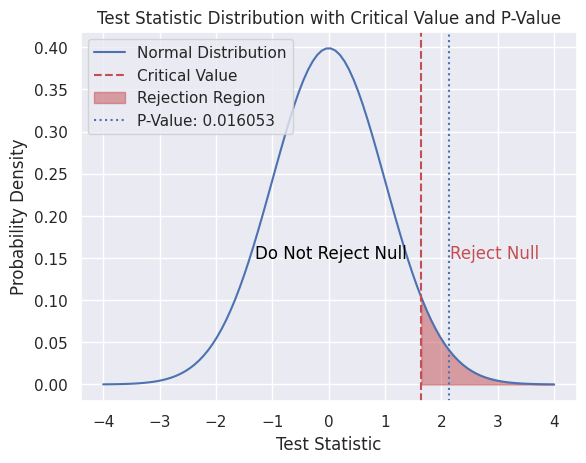

In [60]:
# Plotting P value and rejection critical region
plt = plot_test_statistic_distribution(alpha=0.05, p_value=np.round(p_value_2,6))
plt.show()  # Display the plot

**Step 7**:
**Insights**

The p-value (0.016052616408112556) is less than the level of significance (0.05) and we, therefore, reject the null hypothesis.(Shown in graph as well in blue dotted line)
At .05 significance level, we conclude that we have enough statistical evidence to say that propertion of conversions of new landing page is greater then old landing page.

#### Q3.Does the converted status depend on the preferred language?


---
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value


In [61]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index')*100

converted,no,yes
language_preferred,,
English,34.375000,65.625000
French,55.882353,44.117647
Spanish,47.058824,52.941176


Already we have stackbar chart

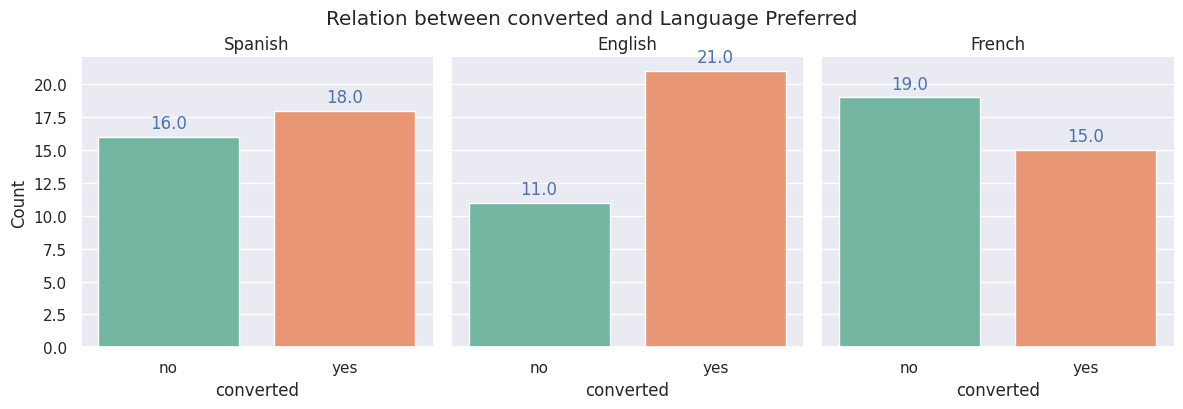

In [79]:
create_catplot_with_annotations(df, x='converted', hue='converted', col='language_preferred', colors=(colors[0],colors[1]), title="Relation between converted and Language Preferred");

### Observation:
English has the highest number (21)i.e(66%) of people who is converted as subscriber followed by spanish (18)i.e(52%)

**Step1:** Define null and alternate Hypothesis
---
- > $H_0:$ Converted (as subscriber) independent of language preferred
- > $H_a:$ Converted ((as subscriber) depends on language preferred



**Step 2:**

we need to fund relationship of two categorical variables, Converted (converted as subscriber or not) and Language preferred.
Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

---

A **Chi-square test of independence** would be the appropriate here.


**Step 3 :**
Assumption of Significance Level
---
We assume the significance level $\alpha$ to be 0.5. This value represents the probability of rejecting the null hypothesis when it is actually true.

- **Significance Level $\alpha$**: 0.5

**Step 4**: Prepare data

In [63]:
# Create contignecy table from language_preffered and converted
contigency_table_conv_language=pd.crosstab(df['language_preferred'],df['converted'],normalize=False)

**Step 5:**

 Calculate p-value

In [64]:
chi, p_value_3, dof, expected = stats.chi2_contingency(contigency_table_conv_language)
print('The p-value is', p_value_3)
print('The p-chi stats is', chi)
print('The p-df is', dof)
print('The expected is', expected)

The p-value is 0.2129888748754345
The p-chi stats is 3.0930306905370832
The p-df is 2
The expected is [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


**Step 6: Compare the p-value with $\alpha$**

In [65]:
check_and_print_inference(p_value_3)

P-value 0.2130 is greater than the significance level 0.0500, we fail to reject the null hypothesis.


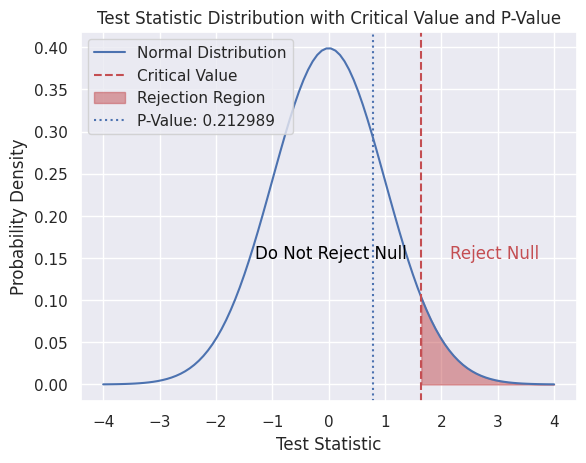

In [66]:
# Plotting P value and rejection critical region
plt = plot_test_statistic_distribution(alpha=0.05, p_value=np.round(p_value_3,6))
plt.show()  # Display the plot

**Step 7**:
**Insights**
- The p-value (0.2129 approx) is greater than the level of significance (0.05) and we, therefore, canot reject null hypotheisis with 95% level of confidence .
- That means Converted  does not depends on language preferred .So converted is independent of language_prefered


#### Q4.Is the mean time spent on the new page same for the different language users?


---
- Perform visual analysis - Formulate null and alternative hypotheses - Select the appropriate test - Calculate the p-value - Write the inference based on the p-value


In [73]:
# Spearte dataframe based on landing page
new_landing_df=df[df['landing_page']=='new']
old_landing_df=df[df['landing_page']=='old']

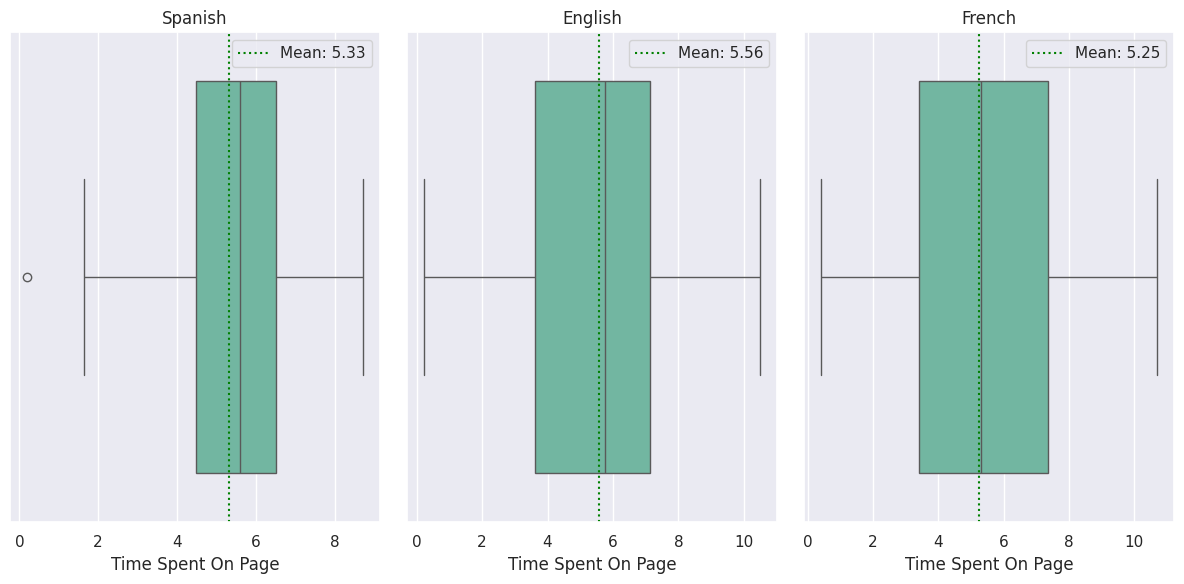

In [82]:
# Box plot to show distribution of time spent on page for overall smaple includes both old and new landing
plt=plot_box_plot_side_by_side(df, x='time_spent_on_the_page', xlabel='Time Spent On Page', category_col='language_preferred',color=colors[0])
plt.show()

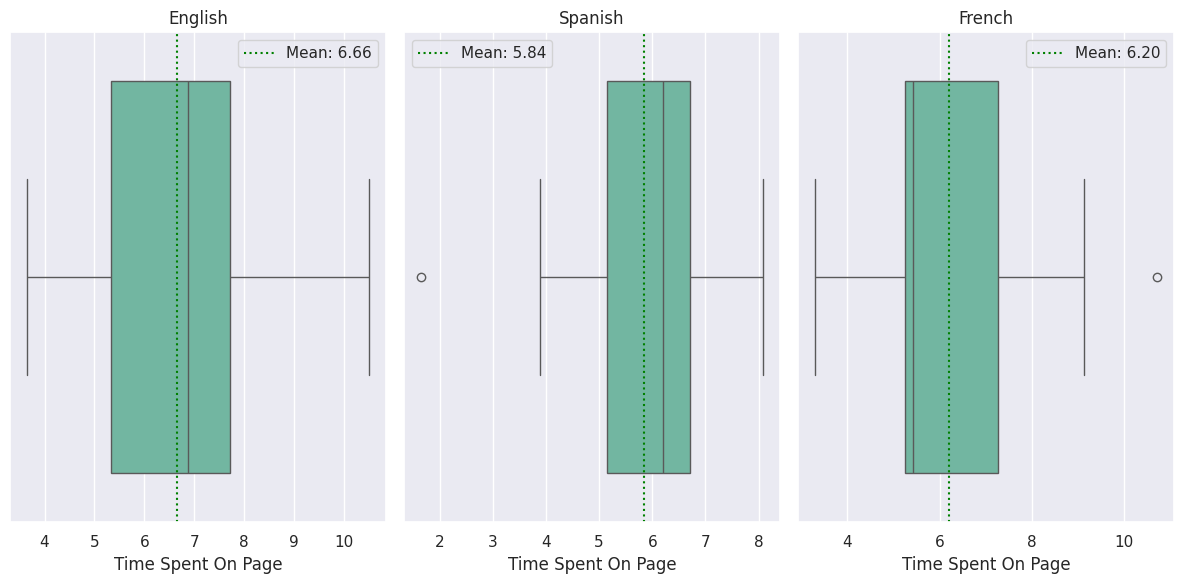

In [83]:
# Box plot to show distribution of time spent on page for new landing page
plt=plot_box_plot_side_by_side(new_landing_df, x='time_spent_on_the_page', xlabel='Time Spent On Page', category_col='language_preferred',color=colors[0])
plt.show()

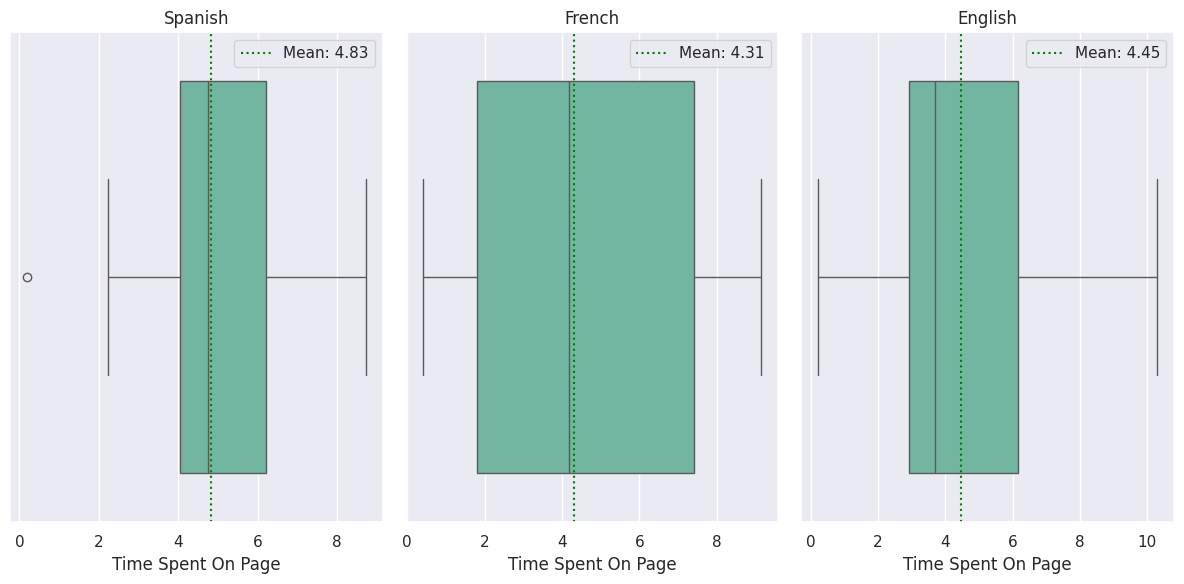

In [84]:
# Box plot to show distribution of time spent on page for old landing page
plt=plot_box_plot_side_by_side(old_landing_df, x='time_spent_on_the_page', xlabel='Time Spent On Page', category_col='language_preferred',color=colors[0])
plt.show()

###Observation:
**Overall:**
The average time spent for overall sample across all language is almost same.More details below.


---

| Language Preferred | Mean Time Spent on the Page |
|--------------------|----------------------------|
| Spanish            | 5.33                        |
| English            | 5.56                        |
| French             | 5.25                        |

---
**Old Landing Page:**
The average time spent for old landing page across all language is almost same.
---
| Language Preferred | Mean Time Spent on the Page |
|--------------------|----------------------------|
| Spanish            | 4.83                        |
| English            | 4.45                        |
| French             | 4.31                        |

---
**New Landing Page:**Here we see little bit of variation mean time .We even observed that distribution in French is skewed towards right where as English and Spanish are skewed towards left.
-  75% percentile  for English,Spanish and French  is 7.7 Approx,6.6 Approx, 7.4 Approx respectively


---



| Language Preferred | Mean Time Spent on the Page |
|--------------------|----------------------------|
| Spanish            | 5.84                        |
| English            | 6.66                        |
| French             | 6.20                        |

---





**Step1:** Define null and alternate Hypothesis
---
 Assume $\mu_1, \mu_2, \mu_3$ be the average time spent on the new landing page  on English,Spanish and French respectively.
- > $H_0:$ The mean time spent for all the language is same on new landing page.
- > $H_a:$  The mean time spent on new landing page is not same (Atleast one out of three is different)


>$H_0: \mu_1 = \mu_2 = \mu_3$
 against the alternative hypothesis

>$H_a: $ At least one is different from the rest.


Step 2:
Here  **One-way ANOVA Test** can be applied. Since it involves testing the effect of one independent factor across different sample groups. However, before applying the test, we need to ensure that the following conditions are met:

- Difference of means of more then two or more samples.(we have three sample mean (ENglish,Spanish and French))
- The populations are normally distributed.(Shapiro-Wilk’s test)
- The variance among the populations is equal.(For equality of variance, Levene test is applied to the response variable)




**Step 3 :**
Assumption of Significance Level
---
We assume the significance level $\alpha$ to be 0.5. This value represents the probability of rejecting the null hypothesis when it is actually true.

- **Significance Level $\alpha$**: 0.5

**Step 4**: Prepare data

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on landing page a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on landing page does not follow a normal distribution

In [85]:
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing_df['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [86]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_landing_df['time_spent_on_the_page'][new_landing_df['language_preferred']=="English"],
                                   new_landing_df['time_spent_on_the_page'][new_landing_df['language_preferred']=="Spanish"],
                                   new_landing_df['time_spent_on_the_page'][new_landing_df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.
At a 5% significance level, we conclude that variances of all the variables are equal.



### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



In [90]:
#import the required function
from scipy.stats import f_oneway

# Perform one-way ANOVA test
test_stat_4, p_value_4 = f_oneway(
    new_landing_df[new_landing_df['language_preferred'] == 'Spanish']['time_spent_on_the_page'],
    new_landing_df[new_landing_df['language_preferred'] == 'English']['time_spent_on_the_page'],
    new_landing_df[new_landing_df['language_preferred'] == 'French']['time_spent_on_the_page']
)

print('The p-value is ' + str(p_value_4))
print('The test-stat is ' + str(test_stat_4))


The p-value is 0.43204138694325955
The test-stat is 0.8543992770006822


**Step 6: Compare the p-value with $\alpha$**

In [91]:
# check and print the inference
check_and_print_inference(p_value_4)

P-value 0.4320 is greater than the significance level 0.0500, we fail to reject the null hypothesis.


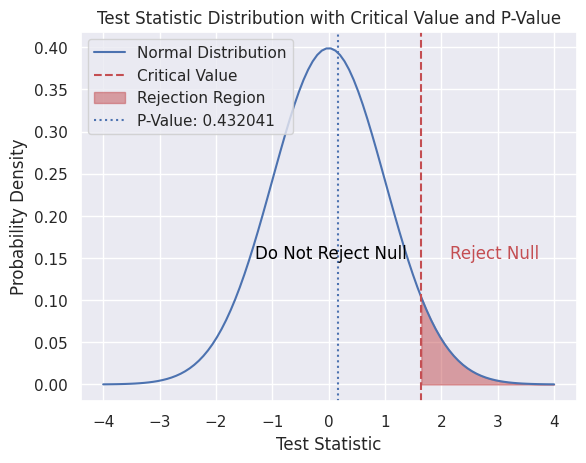

In [92]:
# Plotting P value and rejection critical region
plt = plot_test_statistic_distribution(alpha=0.05, p_value=np.round(p_value_4,6))
plt.show()  # Display the plot

**Step 7**:
**Insights**
The p-value (0.43204138694325955) is greater than the level of significance (0.05) ,therefore, fail to reject the null hypothesis.

We can say with 95% confidence that the mean time spent on the new landing page for all three languages is equal

####Conclusion and Business Recommendation

**Conclusion**

- There is no missing and duplicated data found in sample.
- Most of the visitors spent around 3.88 to 7 mins on landing page
- Its found that more people have subscribed to news from E-news Express (54) compared to non subscriber (46).
- It's also observed more no of users from Language english are converted as subscriber(65%)
- It seems people who spends more time on landing page have higher chance to get converted.
- we have equal no of users count for both old and new landing page and group.
- We had seen that new landing page leave good impression on users as people who visit new landing page have more conversion rate(66%).
- It's seen that "control" group always refers to old landing page where as "treatment" group always refers to new landing page. Not sure why it's so but may be more data needed for deeper analysis.
- It is observed that users of treatment group has higher chances(66%) of getting converted to subscribers compare to control(42%) according to sample.It might be due to new landing page as treatment group always refers new landing page.
- Below is one more imprtant insights w.r.t language
---

| Language | Observation                                                                 |
|----------|-----------------------------------------------------------------------------|
| Spanish  | We can observe 75% of converted users have spent around 6-7 minutes         |
| English  | We can observe 75% of converted users have spent around 5.4-7.4 minutes (Approx) |
| French   | We can observe 75% of converted users have spent around 5.9-8.1 minutes (Approx) |
---

- It seems that users who engage with the Spanish version of the landing page, even with less time spent on the page, have a higher likelihood of conversion compared to users of other languages. However, the current dataset does not provide enough statistical evidence to confirm that conversion to subscriber status depends on language preference. In the future, a larger sample may be needed to investigate this further.
- Avg time spent by users on new landing page is 6.22 where as it's 4.53 for old landing page.
- The avg. time spent on the new landing page by users of all languages is found to be the almost same.

**Recommendations**

-  Collect users age group,demographics,occupation data (non PII data) to target specific set of users and make our landing page appealing to them .
- Consider adding more content to the landing page, focusing on the first half of significant items, and including portions of the article on subsequent pages. This strategy will help ensure that users don’t miss important news and will likely boost their interest and in turns make them subscriber.This will increase the time spent by users on landing page and we have seen spending more time with landing page will increase the chance of subscription.
- Using high-quality fonts and strategically chosen images(without wasting space) will make the design more appealing.
- Since it's an e-news, it would be beneficial to check its search engine ranking on Bing and Google. This ensures that your target audience can easily find it.
- Adding addverisement on social media or youtube so that people will know about this.
-  Consider adding a manifest or summary page so that people who don't have time to read everything can quickly catch up on current affairs. This could help increase your user base.
- Collecting more data on the language will give evidence.if language has any role for  conversion.

**Remarks**
- The E-news Express should adopt the new landing page, as it has demonstrated a higher conversion rate.







